c:\users\karti\anaconda30\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\karti\anaconda30\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\karti\anaconda30\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


0
0
0
0
0
0
[[1]
 [4]
 [2]
 [5]]


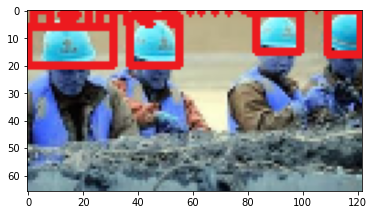

0
[[0]]


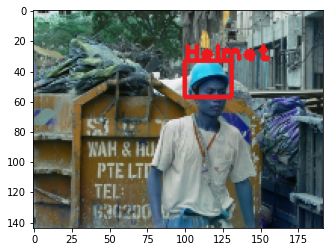

0
0
0
0
0
[[4]
 [1]
 [2]]


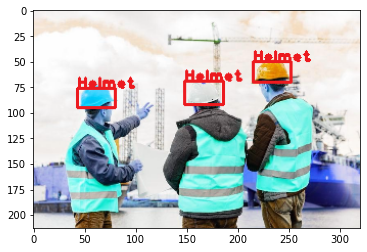

0
0
0
0
0
0
0
[[4]
 [6]
 [0]
 [1]]


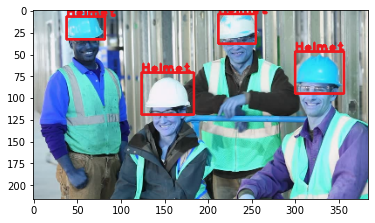

0
[[0]]


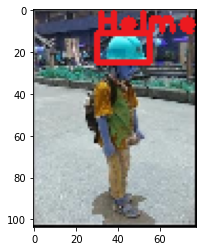

0
0
0
0
0
0
[[1]
 [2]]


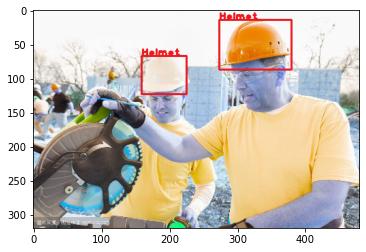

0
0
[[1]]


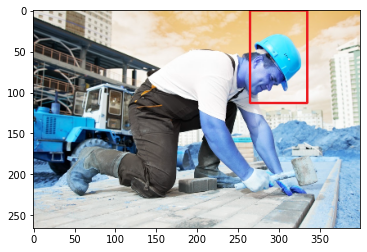

0
0
0
0
0
[[0]
 [4]
 [2]]


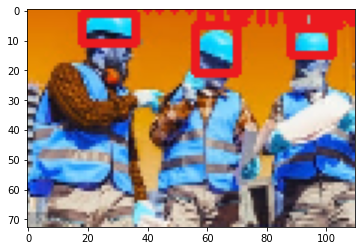

In [1]:
import cv2
import numpy as np
import glob
import random
import matplotlib.pyplot as plt


# Load Yolo
net = cv2.dnn.readNet("yolov3_training_last1.weights", "yolov3_testing.cfg")

# Name custom object
classes = ["Helmet"]

# Images path
images_path = glob.glob(r"C:\Users\karti\Favorites\Downloads\archive (3)\helmet_dataset\Test\*.jpg")



layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Insert here the path of your images
random.shuffle(images_path)
# loop through all the images
for img_path in images_path:
    # Loading image
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.3:
                # Object detected
                print(class_id)
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    print(indexes)

    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y ), font, 1, color, 2)


    #cv2.imshow("Image", img)
    #key = cv2.waitKey(0)
    plt.imshow(img)
    plt.show()

#cv2.destroyAllWindows()